<center><h1>QBUS2820 - Predictive Analytics</h1></center>

# Tutorial 08 - Classification Methods

## KNN Classification

k Nearest Neighbors is a very simple, yet highly effective and scalable
classifcation method. It is supervised in the sense that we build a decision
mesh based on observed training data. It is non-parametric, meaning
it makes no assumptions about the structure or form of the generative function.
It is also instance-based which means that it doesn't explicitiy learn
a model. Instead it simply uses the training data as "knowledge" about the
domain. Practically this means that the training data is only used when a
specific query is made ("which data points am I closest to?").

This highly flexible and "just in time" nature means that it scales well to
hugre volumes of data and is often the first port of call for classifying
massive data sets.

Since KNN is non-parametric it is generally considered to have high variance
and low bias. However we can tune this by increasing k - the number of neighbours
to average over. A higher value for k leads to a smoother decision mesh/boundary
and lower variance. For each application you must tune k on your training data
for optimal performance.

KNN can perform poorly if your features are not all at the same scale.
Therefore it is good to normalise them to be within the same range if we have such data, otherwise
features with larger or smaller scales can dominate.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn import neighbors
from sklearn.datasets import make_blobs

X, y = make_blobs(100, centers= [[2, 2],[1, -2]], cluster_std=[1.5, 1.5], random_state = 1)

We will generate a set of x,y locations. These will then be fed into the predict() function of our KNN classifiers. Then we can plot the result of each x,y position to show the boundary of the classifiers.

In [2]:
"""
Initialise some plotting variables
"""
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Do KNN Classification for k = 1

In [3]:
n_neighbor_1 = 1

knn_clf_1 = neighbors.KNeighborsClassifier(n_neighbor_1, weights='uniform' )
knn_clf_1.fit(X, y)

Z_1 = knn_clf_1.predict(np.c_[xx.ravel(), yy.ravel()])  
# np.c_ is a way to combine 1D arrays into 2D array
# Put the result into a color plot
Z_1 = Z_1.reshape(xx.shape)

Do KNN Classification for k = 50

In [4]:
n_neighbor_2 = 50

knn_clf_50 = neighbors.KNeighborsClassifier(n_neighbor_2, weights='uniform' )
knn_clf_50.fit(X, y)

Z_50 = knn_clf_50.predict(np.c_[xx.ravel(), yy.ravel()])  

Z_50 = Z_50.reshape(xx.shape)

Plot the decision boundary and the classification of indivudal data points

Text(0.5, 1.0, '2-Class classification (k = 50)')

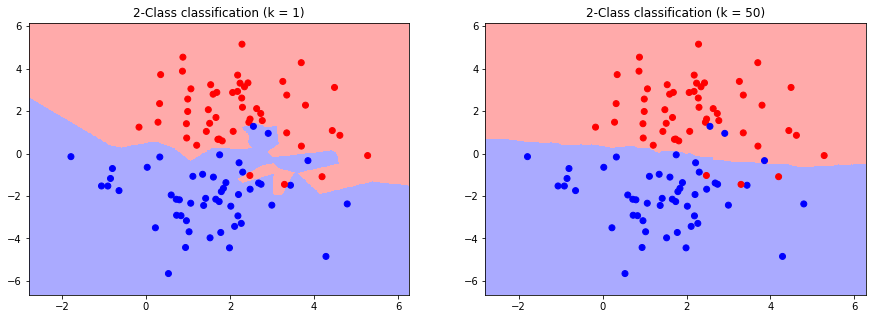

In [6]:
fig5 = plt.figure()

plt.subplot(1, 2, 1)
plt.gcf().set_size_inches(15, 5)
plt.pcolormesh(xx, yy, Z_1, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = {0})".format(n_neighbor_1))

plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(15, 5)
plt.pcolormesh(xx, yy, Z_50, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = {0})".format(n_neighbor_2))

#### Observations

Note that with small k we have high variance/low bias (model fits closely to training data) and with larger k we have low variance/high bias (model fits more closely to generative data process).

In other words it is likely that a small k value will lead to overfitting, while larger k can lead to underfitting.

## KNN Classification - Practical Example and Optimising k

We can use KNN Classification for all sorts of data. Here we will use KNN to classify
images of hand written English characters.

In this dataset there are 1797 character image. Each image is 8x8 pixels i.e.
of dimension 64. We reshape each image to a 64x1 vector. Therefore we are
"searching" in 64 dimensional space.

**We will use cross validation on the training set to determine performance of a range of k values and then perform final evaluation on the test set.**

The dataset is built into scikit. However you will need to download it from the web as it is too large to be bundled directly.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

digits = datasets.load_digits()

Let's take a look at some sample images. The images in this dataset come from postal codes so they are all numeric.

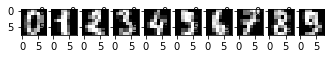

In [11]:
fig6 = plt.figure()
plt.gray()
for i in range(1, 11):
    plt.subplot(1, 11, i)
    plt.imshow(digits.images[i - 1])

Split the data into train, validation and test sets

In [1]:
trainData, testData, trainLabels, testLabels = train_test_split(np.array(digits.data), digits.target, test_size=0.25, random_state=42)

print("N Training Points: {}".format(len(trainLabels)))
print("m Test points: {}".format(len(testLabels)))

NameError: name 'train_test_split' is not defined

#### Optimising k

To determine the optimal k we will train our classifier on the training data with various vlaues of k. We will then evaluate the performance of each model on the validation set.

In [13]:
# Store cv score for each k
cv_scores = []
k_vals = []
 
for k in range(1, 30, 2):
    
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(model, trainData, trainLabels, cv=10, scoring='accuracy')
    score = scores.mean()
    
    print("k={0}, cv_score={1:.2f}".format(k, score * 100))
    
    cv_scores.append(score)
    k_vals.append(k)
 

# Find best performing k
idx = np.argmax(cv_scores)
print("k={0} achieved highest accuracy of {1:.2f}".format(k_vals[idx], cv_scores[idx] * 100))

k=1, cv_score=98.74
k=3, cv_score=98.37
k=5, cv_score=98.44
k=7, cv_score=97.92
k=9, cv_score=97.77
k=11, cv_score=97.62
k=13, cv_score=97.11
k=15, cv_score=97.33
k=17, cv_score=96.88
k=19, cv_score=96.36
k=21, cv_score=95.92
k=23, cv_score=95.77
k=25, cv_score=95.62
k=27, cv_score=95.40
k=29, cv_score=95.25
k=1 achieved highest accuracy of 98.74


We now know that the best k for this set of training and validation data is $k = 1$. We may find a different result if we reshuffle the data or obtain new data.

Finally we can build our optimal classifier and evaluate on the test set.

**Note this is a multi-class classification example.**

In [14]:
model = neighbors.KNeighborsClassifier(n_neighbors = k_vals[idx])

model.fit(trainData, trainLabels)

predictions = model.predict(testData)
 
# Final classification report
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [15]:
print(confusion_matrix(testLabels, predictions))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


#### Observations

Suprisingly our KNN classifier achieves near perfect classification accuracy on this data set.

**Remember:** more complex models do not guarantee better results. Sometimes some simple methods can be quite effective. 

## Logistic Regression

**WARNING: Do not use regression for classification tasks.**

In general it is ill advised to use linear regression for
classification tasks. Regression learns a continious output variable from
a predefined linear (or higher order) model. It learns the parameters
of this model to predict an output.

Classification on the other hand is not explicity interested in the
underlying generative process. Rather it is a higher abstraction. We are not
interested in the specific value of something. Instead we want to assign
each data vector to the most likely class.

Logistic regression provides us with some desirable properties:
- the output of the logistic function is the direct probability of the data vector belonging to the success case: $\hat{P}(Y=1|X=x_i)= \widehat{p}(x_i)$

- the logistic function is non-linear and more flexible than a linear regression, which can improve classification accuracy and is often more robust to outliers. 

**About the dataset**

The data shows credit card loan status for many accounts with three features: student, balance remaining and income.

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Default.csv')

Convert the student category column to Boolean values

In [17]:
df.student = np.where(df.student == 'Yes', 1, 0)

Use the balance feature and set the default status as the target value to predict. You could also use all available features if you believe that they are informative.

In [18]:
X = df[['balance']]
y = df[['default']]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

Fit the Logistic Regression model

In [19]:
log_res = LogisticRegression()

log_res.fit(X_train, y_train)

C:\Users\cwan6954\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [20]:
log_res.coef_ 

array([[0.00572074]])

In [21]:
log_res.intercept_ 

array([-10.93047526])

### Predict probabilities of default:

predict_proba() returns the probabilities of an observation belonging to each class. This is computed from the logistic function.

$$\frac{\exp(a)}{1+\exp(a)}=\frac{1}{1+\exp(-a)}$$

predict() is dependant on predict_proba(). predict() returns the class assignment based on the proability and the decision boundary. In other words predict returns the most likely class i.e. the class with greatest probability or probability > 50%.

In [22]:
prob = log_res.predict_proba(pd.DataFrame({'balance': [1200, 2500]}))
print("Probability of default with Balance of 1200: {0:.2f}%".format(prob[0,1] * 100))
print("Probability of default with Balance of 2500: {0:.2f}%".format(prob[1,1] * 100))

outcome = log_res.predict(pd.DataFrame({'balance': [1200, 2500]}))
print("Assigned class with Balance of 1200: {0}".format(outcome[0]))
print("Assigned class with Balance of 2500: {0}".format(outcome[1]))

Probability of default with Balance of 1200: 1.69%
Probability of default with Balance of 2500: 96.68%
Assigned class with Balance of 1200: 0
Assigned class with Balance of 2500: 1


We can evaluate classification accuracy using confusion matrix and the classification report:

In [23]:
from sklearn.metrics import confusion_matrix

pred_log = log_res.predict(X_val)

print(confusion_matrix(y_val,pred_log))

[[2891   18]
 [  59   32]]


In [25]:
from sklearn.metrics import classification_report  

print(classification_report(y_val, pred_log, digits=3))

              precision    recall  f1-score   support

           0      0.980     0.994     0.987      2909
           1      0.640     0.352     0.454        91

    accuracy                          0.974      3000
   macro avg      0.810     0.673     0.720      3000
weighted avg      0.970     0.974     0.971      3000

